<a href="https://colab.research.google.com/github/rekhachakkara/python_projects/blob/master/Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from google.colab import drive
drive.mount('/content/drive')

import pandas  as  pd
import datetime
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_forest = pd.read_csv("/content/drive/MyDrive/Data_set_rekha/forestfires.csv")
data_forest.head(5)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [ ]:
#top 10 burnt area in month
data_top10_burnt = data_forest.groupby('month')['area'].max().to_frame('area').reset_index()
data_top10_sorted = data_top10_burnt.sort_values(by=['area'], ascending=False)
print(data_top10_sorted, 10)

   month     area
11   sep  1090.84
1    aug   746.28
5    jul   278.53
6    jun    70.32
0    apr    61.13
3    feb    51.78
10   oct    49.37
8    may    38.48
7    mar    36.85
2    dec    24.77
4    jan     0.00
9    nov     0.00 10


In [ ]:
#high and low temperature
def mmm_to_index(row):
  dict_mmm_idx = {"jan":1, "feb":2, "mar":3, "apr":4, "may":5, "jun":6, "jul":7,\
                  "aug":8, "sep":9, "oct":10, "nov":11, "dec":12}
  return dict_mmm_idx[str(row["month"])]

data_high_low_temp = data_forest.groupby(["month"]).agg({"temp":['max', 'min']})
data_high_low_temp.columns = data_high_low_temp.columns.droplevel()
data_high_low_temp.reset_index(inplace=True)
data_high_low_temp.columns = ['month','highest_temp', "lowest_temp"]
data_high_low_temp['month_index'] = data_high_low_temp.apply(mmm_to_index, axis=1)
data_high_low_temp = data_high_low_temp.sort_values(by=['month_index'], ascending=True)
print(data_high_low_temp, 10)

   month  highest_temp  lowest_temp  month_index
4    jan           5.3          5.2            1
3    feb          15.7          4.2            2
7    mar          18.8          5.3            3
0    apr          17.6          5.8            4
8    may          18.0         11.3            5
6    jun          28.0         10.6            6
5    jul          30.2         12.6            7
1    aug          33.3          5.1            8
11   sep          30.2          9.8            9
10   oct          21.7         11.3           10
9    nov          11.8         11.8           11
2    dec           5.1          2.2           12 10


In [ ]:
#month high and low wind
data_high_low_wind = data_forest.groupby(["month"]).agg({"wind":['max', 'min']})
data_high_low_wind.columns = data_high_low_wind.columns.droplevel()
data_high_low_wind.reset_index(inplace=True)
data_high_low_wind.columns = ['month','highest_wind', "lowest_wind"]
data_high_low_wind['month_index'] = data_high_low_wind.apply(mmm_to_index, axis=1)
data_high_low_wind = data_high_low_wind.sort_values(by=['month_index'], ascending=True)
print(data_high_low_wind, 10)

   month  highest_wind  lowest_wind  month_index
4    jan           3.1          0.9            1
3    feb           9.4          0.9            2
7    mar           9.4          0.9            3
0    apr           9.4          1.8            4
8    may           4.9          4.0            5
6    jun           9.4          1.3            6
5    jul           8.0          0.9            7
1    aug           8.9          0.4            8
11   sep           7.6          0.9            9
10   oct           5.4          0.9           10
9    nov           4.5          4.5           11
2    dec           8.5          4.9           12 10


In [ ]:
#month high and low Relative
data_high_low_rela = data_forest.groupby(["month"]).agg({"RH":['max', 'min']})
data_high_low_rela.columns = data_high_low_rela.columns.droplevel()
data_high_low_rela.reset_index(inplace=True)
data_high_low_rela.columns = ['month','highest_relative', "low_relative"]
data_high_low_rela['month_index'] = data_high_low_rela.apply(mmm_to_index, axis=1)
data_high_low_rela = data_high_low_rela.sort_values(by=['month_index'], ascending=True)
print(data_high_low_rela, 10)


   month  highest_relative  low_relative  month_index
4    jan               100            78            1
3    feb                82            35            2
7    mar                99            18            3
0    apr                75            20            4
8    may                94            40            5
6    jun                90            25            6
5    jul                90            22            7
1    aug                96            19            8
11   sep                86            15            9
10   oct                60            24           10
9    nov                31            31           11
2    dec                61            21           12 10


In [13]:
#joi and merge 1 to 4
df_join_1 = pd.merge(data_top10_sorted, data_high_low_temp, on=['month'], how='inner', sort=False)
df_join_2 = pd.merge(df_join_1, data_high_low_wind, on=['month', 'month_index'], how='inner', sort=False)
df_join_3 = pd.merge(df_join_2, data_high_low_rela, on=['month', 'month_index'], how='inner', sort=False)
df_join_3 = df_join_3.sort_values(by=['month_index'], ascending=True)
print(df_join_3, 12)

   month     area  highest_temp  lowest_temp  month_index  highest_wind  \
10   jan     0.00           5.3          5.2            1           3.1   
5    feb    51.78          15.7          4.2            2           9.4   
8    mar    36.85          18.8          5.3            3           9.4   
4    apr    61.13          17.6          5.8            4           9.4   
7    may    38.48          18.0         11.3            5           4.9   
3    jun    70.32          28.0         10.6            6           9.4   
2    jul   278.53          30.2         12.6            7           8.0   
1    aug   746.28          33.3          5.1            8           8.9   
0    sep  1090.84          30.2          9.8            9           7.6   
6    oct    49.37          21.7         11.3           10           5.4   
11   nov     0.00          11.8         11.8           11           4.5   
9    dec    24.77           5.1          2.2           12           8.5   

    lowest_wind  highest

   month     area  highest_temp  lowest_temp  month_index  highest_wind  \
10   jan     0.00           5.3          5.2            1           3.1   
5    feb    51.78          15.7          4.2            2           9.4   
8    mar    36.85          18.8          5.3            3           9.4   
4    apr    61.13          17.6          5.8            4           9.4   
7    may    38.48          18.0         11.3            5           4.9   
3    jun    70.32          28.0         10.6            6           9.4   
2    jul   278.53          30.2         12.6            7           8.0   
1    aug   746.28          33.3          5.1            8           8.9   
0    sep  1090.84          30.2          9.8            9           7.6   
6    oct    49.37          21.7         11.3           10           5.4   
11   nov     0.00          11.8         11.8           11           4.5   
9    dec    24.77           5.1          2.2           12           8.5   

    lowest_wind  highest

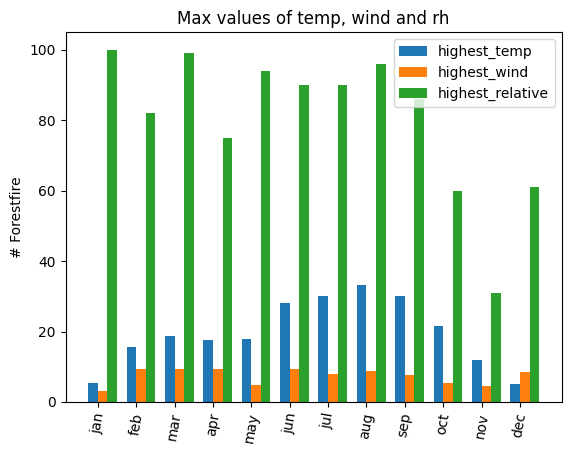

In [18]:
#6 plot bar chart
N = 12
print(df_join_3, 2)
high_temp = list(df_join_3["highest_temp"])[0:N]
high_wind = list(df_join_3["highest_wind"])[0:N]
high_rh = list(df_join_3['highest_relative'])[0:N]
lst_name = list(df_join_3["month"])[0:N]
ind = np.arange(N)
width = 0.25
plt.bar(ind, high_temp, width, label='highest_temp')
plt.bar(ind + width, high_wind, width, label='highest_wind')
plt.bar(ind + 2* width, high_rh, width, label='highest_relative')

plt.ylabel('# Forestfire')
plt.title('Max values of temp, wind and rh')

plt.xticks(ind + width / 2, lst_name, rotation=80)
plt.legend(loc='best')
plt.show()
